In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV

In [2]:
cancer=load_breast_cancer()

In [3]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 스케일링

In [5]:
x = df.iloc[:,:-1] #마지막열 빼고 전부
y = df.iloc[:,-1] #마지막열

In [6]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [8]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
#스케일링(standard scaler)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y
                                                 ,test_size=0.3
                                                ,random_state=1234)

- 선형분리

## SVM 분류모델(SVC)

In [10]:
svc = SVC(kernel='linear',random_state=0)
#SVC,선형

### 교차검증

In [11]:
scores = cross_val_score(svc,x_scaled,y,cv= 5)
scores
#교차검증, cross_val_score(model,data,target,cv)

array([0.95614035, 0.98245614, 0.96491228, 0.96491228, 0.98230088])

In [12]:
print('교차검증 평균:',scores.mean())
#교차검증값의 평균값을 내서 사용함

교차검증 평균: 0.9701443875174661


### 그리드서치

In [13]:
svc = SVC(kernel='linear',random_state=0)
#SVC,선형

In [14]:
parameter={'C':[0.001,0.01,0.1,1,10,25,50,100]}
#GridSearch를 사용하기 위해 사용모델의 파라미터를 딕셔너리화

In [15]:
grid_svc=GridSearchCV(svc,param_grid=parameter,cv=5)
#GridSearchCV(모델,파라미터,5개로)

In [16]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]})

In [17]:
result = pd.DataFrame(grid_svc.cv_results_['params'])

In [18]:
result

,C
0,0.001
1,0.010
2,0.100
3,1.000
4,10.000
5,25.000
6,50.000
7,100.000


In [19]:
result['평균 score'] = grid_svc.cv_results_['mean_test_score']

In [20]:
result.sort_values(by='평균 score',ascending=False)

,C,평균 score
2,0.100,0.977373
3,1.000,0.974842
1,0.010,0.972342
5,25.000,0.969842
6,50.000,0.969842
7,100.000,0.969842
4,10.000,0.969842
0,0.001,0.939684


### 비선형

In [21]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib import rc


In [22]:
x,y=make_moons(n_samples=300,noise=0.16,random_state=42)

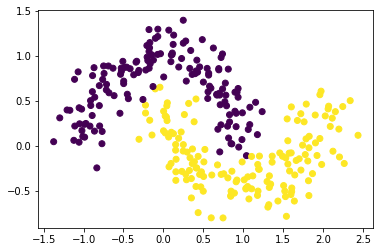

In [23]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.3,
                                               random_state=1234)

In [25]:
svm = SVC(kernel='linear',random_state=100)
#비선형데이터일때 선형모델을 사용하면 어떤 결과가 나오는지 확인하기 위함
scores = cross_val_score(svm,x,y,cv=5)
#교차검증
scores

array([0.86666667, 0.88333333, 0.88333333, 0.83333333, 0.83333333])

In [26]:
pd.DataFrame(cross_validate(svm,x,y,cv=5))
print('교차검증 평균:',scores.mean())

교차검증 평균: 0.86


In [27]:
#비선형 모델, rbf(가우시안 커널 많이 사용)
svm = SVC(kernel='rbf',random_state=100)

scores = cross_val_score(svm,x,y,cv=5)
#교차검증
scores

array([0.98333333, 0.96666667, 0.98333333, 0.95      , 0.96666667])

In [28]:
pd.DataFrame(cross_validate(svm,x,y,cv=5))
print('교차검증 평균:',scores.mean())

교차검증 평균: 0.97


### 그리드서치

In [29]:
svm = SVC(kernel='rbf',random_state=100)
#사용모델 정의
parameters={'C':[0.001,0.01,0.1,1,10,25,50,100],
           'gamma':[0.001,0.01,0.1,1,10,25,50,100]}
#GridSearch를 사용하기 위해 사용모델의 파라미터를 딕셔너리화

In [30]:
grid_svm=GridSearchCV(svm,param_grid=parameters,cv=5)
#그리드서치
#param_grid = 사용할 파라미터

In [31]:
grid_svm.fit(x,y)
#모델학습

GridSearchCV(cv=5, estimator=SVC(random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]})

In [32]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
#grid_svm.cv_result_의 [params]열을 데이터프레임화
result['평균_score']=grid_svm.cv_results_['mean_test_score']
#result 데이터프레임 생성
result.sort_values(by='평균_score',ascending=False)
#정렬

,C,gamma,평균_score
52,50.000,10.000,0.986667
60,100.000,10.000,0.986667
61,100.000,25.000,0.986667
45,25.000,25.000,0.986667
53,50.000,25.000,0.986667
...,...,...,...
17,0.100,0.010,0.790000
16,0.100,0.001,0.790000
9,0.010,0.010,0.790000
8,0.010,0.001,0.790000
